In [86]:
%pylab inline
from numpy import *
from scipy import integrate
from ipywidgets import interact

Populating the interactive namespace from numpy and matplotlib


In [87]:
def driven_pendulum(t,theta,A,w,Q,spike_period,spike_duty):
    return [
        theta[1],
        A*-sin(w*t)*thick_spikes(w*t,spike_period,spike_duty)if t > pi and t < 3*pi else 0  - theta[1]/Q - theta[0]
    ]
def thick_spikes(x,period,duty):
    return 1 if x % period <= period*0.01*duty else 0

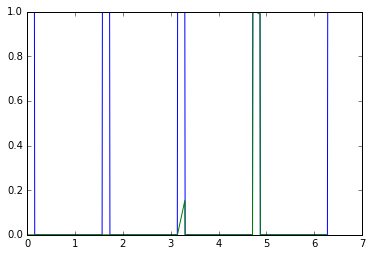

In [88]:
L = linspace(0,2*pi,10**3)
inp = asarray([-sin(x)*thick_spikes(x,0.5*pi,10) if x > pi and x < 3*pi else 0 for x in L ])
y = asarray([thick_spikes(x,0.5*pi,10) for x in L])
plot(L,y)
plot(L,inp)

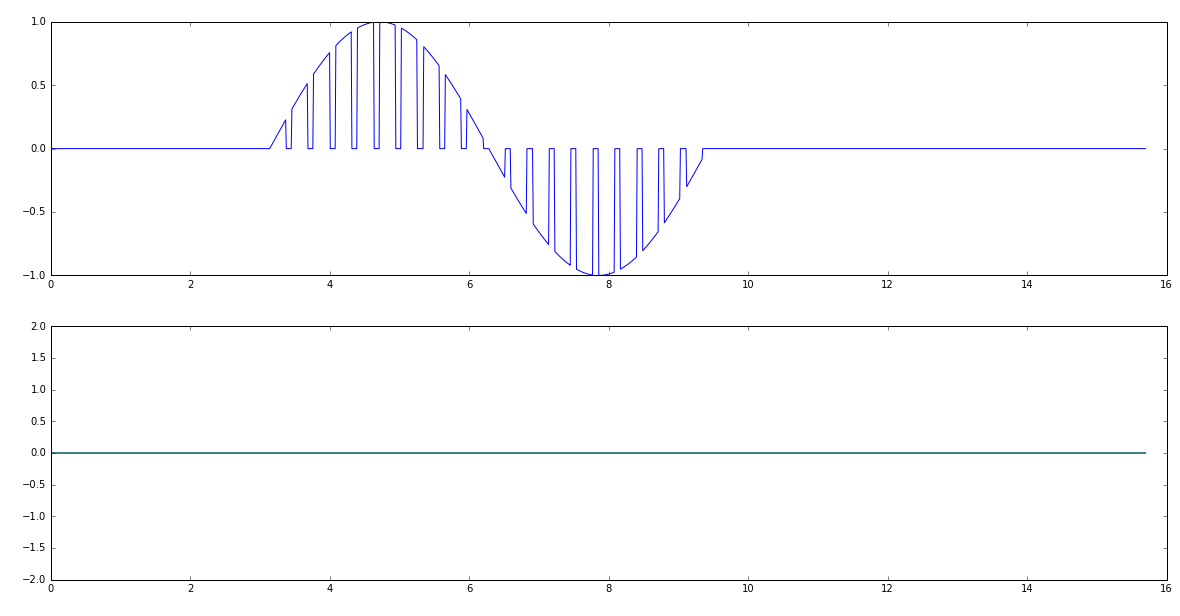

In [89]:
def lcr(init_angle=0,init_vel=0,driv_ampl=1.5,driv_freq=1,qual=0.5,spike_period=0.1*pi,spike_duty=10):
    initial_conditions,t0 = [init_angle, init_vel],0
    time_list = []
    sol = []
    driving = []
    time_step = 0.01
    end_time = 5*pi
    system = integrate.ode(driven_pendulum)
    system.set_f_params(driv_ampl,driv_freq,qual,spike_period,spike_duty)
    system.set_initial_value(initial_conditions,t0)
    while system.successful and system.t < end_time:
        driving.append(-sin(system.t)*thick_spikes(system.t,spike_period,spike_duty) if system.t > pi and system.t < 3*pi else 0)
        time_list.append(system.t)
        sol.append(system.integrate(system.t+time_step))
    sol =asarray(sol)
    fig = figure(figsize=(20,10))
    ax1 = fig.add_subplot(2,1,2)
    ax1.set_ylim(-2,2)
    ax1.set_xlabel("time").set_color('white')
    ax1.plot(time_list,sol)
    ax2 = fig.add_subplot(2,1,1)
    ax2.set_xlabel("time").set_color('white')
    ax2.set_ylabel("Driving Voltage").set_color('white')
    ax2.set_title("Driving voltage").set_color('white')
    ax2.plot(time_list,driving)
    
interact(
    lcr,
    init_angle=(-1.0,1.0,0.1),
    init_vel=(-2.0,2.0,0.1),
    driv_ampl=(0.0,10.0,0.5),
    driv_freq=(0.0,2.0,0.1),
    qual=(0.1,10.0,0.01),
    spike_period=(0.1,5,0.01),
    spike_duty=(1,100,1)
        )

# TODO

1. Finite pulse
2. Sample discretely
3. Fourier analyse
4. Check response for LCR circuits for these and neighboring frequencies.
5. Judge the behavior for a spiky waveform vs. a waveform which is poorly resolved.